# Proyecto 1 - SIMARGL
Sergio Marchena - 16387

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets
df1 = pd.read_csv('dataset-part1.csv')
df2 = pd.read_csv('dataset-part2.csv')

## exploratory analysis 

In [3]:
# first view
df1.head()

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,40,0,1616660040,120,339,0,1616660040010,1616660040,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,",",0,1616660040,120,0,0,1616660040068,1616660040,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,104,0,1616660040,120,44725,44,1616660040114,1616660040,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,",",0,1616660040,120,0,0,1616660040122,1616660040,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,40,0,1616660040,120,1114,1,1616660040184,1616660040,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [4]:
# first view
df2.head()

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,",,48,,,,,,,,,,40,,,,,,,,,,40,,,,,,,,,,40,,,,,,...",0,1618174987,120,104116914,104116,1618175092090,1618175092,...,1460,1460,0,0,0,164,TLS,1,77251491,Normal flow
1,1,0,",,,,,,,,,,,",0,1618175067,120,9529030,9529,1618175077010,1618175077,...,0,0,0,0,0,0,STUN.Messenger,1,77251492,Normal flow
2,1,0,",,,,,,,,,,,",0,1618175067,120,9529169,9529,1618175077010,1618175077,...,0,0,0,0,192,0,ICMP,1,77251493,Normal flow
3,1,0,",",0,1618175077,120,0,0,1618175077021,1618175077,...,0,0,0,0,72,0,ICMP,1,77251494,Normal flow
4,1,0,",",0,1618175077,120,0,0,1618175077069,1618175077,...,0,0,0,0,0,0,Unknown,1,77251495,Normal flow


In [5]:
# merge the dataframes in order to work only with one
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
df

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,40,0,1616660040,120,339,0,1616660040010,1616660040,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,",",0,1616660040,120,0,0,1616660040068,1616660040,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,104,0,1616660040,120,44725,44,1616660040114,1616660040,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,",",0,1616660040,120,0,0,1616660040122,1616660040,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,40,0,1616660040,120,1114,1,1616660040184,1616660040,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207868,1,0,"240,,,,,,,,,,,,,,240",0,1618262463,120,14015728,14015,1618262477935,1618262477,...,0,0,0,0,0,0,DNS.UbuntuONE,1,85888693,Normal flow
12207869,1,0,",",0,1618262477,120,0,0,1618262477940,1618262477,...,0,0,0,0,40,0,Unknown,1,85888694,Normal flow
12207870,1,0,"1259,592,52,,224",0,1618262473,120,4921754,4921,1618262477954,1618262477,...,1460,1410,7,7,40,0,SSH,1,85888695,Normal flow
12207871,1,0,205,0,1618262477,120,376,0,1618262477977,1618262477,...,0,0,0,0,128,0,DNS,1,85888696,Normal flow


In [6]:
# summary of the variables in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12207873 entries, 0 to 12207872
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  

In [7]:
# check for null entries
df.isnull().sum()

BIFLOW_DIRECTION              0
DIRECTION                     0
DST_TO_SRC_SECOND_BYTES       0
FIREWALL_EVENT                0
FIRST_SWITCHED                0
FLOW_ACTIVE_TIMEOUT           0
FLOW_DURATION_MICROSECONDS    0
FLOW_DURATION_MILLISECONDS    0
FLOW_END_MILLISECONDS         0
FLOW_END_SEC                  0
FLOW_ID                       0
FLOW_INACTIVE_TIMEOUT         0
FLOW_START_MILLISECONDS       0
FLOW_START_SEC                0
FRAME_LENGTH                  0
IN_BYTES                      0
IN_PKTS                       0
IPV4_DST_ADDR                 0
IPV4_SRC_ADDR                 0
L4_DST_PORT                   0
L4_SRC_PORT                   0
LAST_SWITCHED                 0
MAX_IP_PKT_LEN                0
MIN_IP_PKT_LEN                0
OOORDER_IN_PKTS               0
OOORDER_OUT_PKTS              0
OUT_BYTES                     0
OUT_PKTS                      0
PROTOCOL                      0
PROTOCOL_MAP                  0
RETRANSMITTED_IN_BYTES        0
RETRANSM

In [8]:
# check for NaN entries
df.isna().sum()

BIFLOW_DIRECTION              0
DIRECTION                     0
DST_TO_SRC_SECOND_BYTES       0
FIREWALL_EVENT                0
FIRST_SWITCHED                0
FLOW_ACTIVE_TIMEOUT           0
FLOW_DURATION_MICROSECONDS    0
FLOW_DURATION_MILLISECONDS    0
FLOW_END_MILLISECONDS         0
FLOW_END_SEC                  0
FLOW_ID                       0
FLOW_INACTIVE_TIMEOUT         0
FLOW_START_MILLISECONDS       0
FLOW_START_SEC                0
FRAME_LENGTH                  0
IN_BYTES                      0
IN_PKTS                       0
IPV4_DST_ADDR                 0
IPV4_SRC_ADDR                 0
L4_DST_PORT                   0
L4_SRC_PORT                   0
LAST_SWITCHED                 0
MAX_IP_PKT_LEN                0
MIN_IP_PKT_LEN                0
OOORDER_IN_PKTS               0
OOORDER_OUT_PKTS              0
OUT_BYTES                     0
OUT_PKTS                      0
PROTOCOL                      0
PROTOCOL_MAP                  0
RETRANSMITTED_IN_BYTES        0
RETRANSM

## pre-processing 

In [9]:
# non numerical variables to deal with:
# 1. 'DST_TO_SRC_SECOND_BYTES'
# 2. 'IPV4_DST_ADDR'
# 3. 'IPV4_SRC_ADDR'
# 4. 'PROTOCOL_MAP'
# 5. 'SRC_TO_DST_SECOND_BYTES'
# 6. 'L7_PROTO_NAME'
# 7. 'LABEL'

In [10]:
# 1. 'DST_TO_SRC_SECOND_BYTES'

df['DST_TO_SRC_SECOND_BYTES'].describe()

# 569243 unique values, too many to encode, dropping it
df.drop('DST_TO_SRC_SECOND_BYTES', axis=1, inplace=True)
df.head(5)

,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,0,1616660040,120,339,0,1616660040010,1616660040,2293398,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,0,1616660040,120,0,0,1616660040068,1616660040,2293400,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,0,1616660040,120,44725,44,1616660040114,1616660040,2293404,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,0,1616660040,120,0,0,1616660040122,1616660040,2293407,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,0,1616660040,120,1114,1,1616660040184,1616660040,2293409,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [11]:
# 2. 'IPV4_DST_ADDR'

df['IPV4_DST_ADDR'].describe()

# 440887 unique values, too many to encode, dropping it
df.drop('IPV4_DST_ADDR', axis=1, inplace=True)
df.head(5)

,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,0,1616660040,120,339,0,1616660040010,1616660040,2293398,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,0,1616660040,120,0,0,1616660040068,1616660040,2293400,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,0,1616660040,120,44725,44,1616660040114,1616660040,2293404,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,0,1616660040,120,0,0,1616660040122,1616660040,2293407,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,0,1616660040,120,1114,1,1616660040184,1616660040,2293409,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [12]:
# 3. 'IPV4_SRC_ADDR'

df['IPV4_SRC_ADDR'].describe()

# 440887 unique values, too many to encode, dropping it
df.drop('IPV4_SRC_ADDR', axis=1, inplace=True)
df.head(5)

,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,0,1616660040,120,339,0,1616660040010,1616660040,2293398,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,0,1616660040,120,0,0,1616660040068,1616660040,2293400,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,0,1616660040,120,44725,44,1616660040114,1616660040,2293404,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,0,1616660040,120,0,0,1616660040122,1616660040,2293407,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,0,1616660040,120,1114,1,1616660040184,1616660040,2293409,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [13]:
# 4. 'PROTOCOL_MAP'

df['PROTOCOL_MAP'].describe()

# 5 unique values, encoding it

count     12207873
unique           5
top            tcp
freq       8950058
Name: PROTOCOL_MAP, dtype: object

In [14]:
# encoding 'PROTOCOL_MAP' to numerical values
df['PROTOCOL_MAP'].value_counts()

# tcp = 1
# udp = 2
# icmp = 3
# ipv6-icmp = 4
# gre = 5

tcp          8950058
udp          2791088
icmp          466697
ipv6-icmp         28
gre                2
Name: PROTOCOL_MAP, dtype: int64

In [15]:
df['PROTOCOL_MAP'] = df['PROTOCOL_MAP'].replace(to_replace='tcp', value=1)
df['PROTOCOL_MAP'] = df['PROTOCOL_MAP'].replace(to_replace='udp', value=2)
df['PROTOCOL_MAP'] = df['PROTOCOL_MAP'].replace(to_replace='icmp', value=3)
df['PROTOCOL_MAP'] = df['PROTOCOL_MAP'].replace(to_replace='ipv6-icmp', value=4)
df['PROTOCOL_MAP'] = df['PROTOCOL_MAP'].replace(to_replace='gre', value=5)

df['PROTOCOL_MAP'].value_counts()
# successfuly encoded!

1    8950058
2    2791088
3     466697
4         28
5          2
Name: PROTOCOL_MAP, dtype: int64

In [16]:
# 5. 'SRC_TO_DST_SECOND_BYTES'

df['SRC_TO_DST_SECOND_BYTES'].describe()

# 3160289 unique values, too many to encode, dropping it

df.drop('SRC_TO_DST_SECOND_BYTES', axis=1, inplace=True)
df.head(5)

,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,0,1616660040,120,339,0,1616660040010,1616660040,2293398,...,1460,0,0,0,0,0,Unknown,1,2293398,Normal flow
1,1,0,0,1616660040,120,0,0,1616660040068,1616660040,2293400,...,0,0,0,0,40,0,ICMP,1,2293400,Normal flow
2,1,0,0,1616660040,120,44725,44,1616660040114,1616660040,2293404,...,0,0,0,0,0,0,TLS,1,2293404,Normal flow
3,1,0,0,1616660040,120,0,0,1616660040122,1616660040,2293407,...,1440,0,8,0,40,0,Unknown,1,2293407,Normal flow
4,1,0,0,1616660040,120,1114,1,1616660040184,1616660040,2293409,...,0,0,0,0,0,0,TLS,1,2293409,Normal flow


In [17]:
# 5. 'L7_PROTO_NAME'

df['L7_PROTO_NAME'].describe(), df['L7_PROTO_NAME'].value_counts()

(count     12207873
 unique         457
 top        Unknown
 freq       4090802
 Name: L7_PROTO_NAME, dtype: object,
 Unknown            4090802
 HTTP               3237616
 DNS                1076385
 TLS                 859143
 ICMP                360551
                     ...   
 NFS.HTTP                 1
 Radius.NFS               1
 OCS                      1
 VHUA.Amazon              1
 COAP.BitTorrent          1
 Name: L7_PROTO_NAME, Length: 457, dtype: int64)

In [18]:
df_test = df[['L7_PROTO_NAME', 'FIREWALL_EVENT']]

In [19]:
labels, unique = pd.factorize(df_test['L7_PROTO_NAME'])

In [20]:
df_test2 = pd.DataFrame(labels, columns = ['new_L7_PROTO_NAME'])
df_test2

,new_L7_PROTO_NAME
0,0
1,1
2,2
3,0
4,2
...,...
12207868,63
12207869,0
12207870,19
12207871,12


In [21]:
# Substituting with numerical value (457 uniques)
df['L7_PROTO_NAME'] = df_test2['new_L7_PROTO_NAME']
df

,BIFLOW_DIRECTION,DIRECTION,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,FLOW_ID,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,0,1616660040,120,339,0,1616660040010,1616660040,2293398,...,1460,0,0,0,0,0,0,1,2293398,Normal flow
1,1,0,0,1616660040,120,0,0,1616660040068,1616660040,2293400,...,0,0,0,0,40,0,1,1,2293400,Normal flow
2,1,0,0,1616660040,120,44725,44,1616660040114,1616660040,2293404,...,0,0,0,0,0,0,2,1,2293404,Normal flow
3,1,0,0,1616660040,120,0,0,1616660040122,1616660040,2293407,...,1440,0,8,0,40,0,0,1,2293407,Normal flow
4,1,0,0,1616660040,120,1114,1,1616660040184,1616660040,2293409,...,0,0,0,0,0,0,2,1,2293409,Normal flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207868,1,0,0,1618262463,120,14015728,14015,1618262477935,1618262477,85888693,...,0,0,0,0,0,0,63,1,85888693,Normal flow
12207869,1,0,0,1618262477,120,0,0,1618262477940,1618262477,85888694,...,0,0,0,0,40,0,0,1,85888694,Normal flow
12207870,1,0,0,1618262473,120,4921754,4921,1618262477954,1618262477,85888695,...,1460,1410,7,7,40,0,19,1,85888695,Normal flow
12207871,1,0,0,1618262477,120,376,0,1618262477977,1618262477,85888696,...,0,0,0,0,128,0,12,1,85888696,Normal flow


In [22]:
# 6. 'LABEL'

df['LABEL'].value_counts()

# **TARGET VALUE**

# 4 unique values, encoding them:

# Normal flow                    = 1
# SYN Scan - aggressive          = 2
# Denial of Service R-U-Dead-Yet = 3
# Denial of Service Slowloris    = 4

Normal flow                       6570058
SYN Scan - aggressive             2496814
Denial of Service R-U-Dead-Yet    2276947
Denial of Service Slowloris        864054
Name: LABEL, dtype: int64

In [23]:
df['LABEL'] = df['LABEL'].replace(to_replace='Normal flow', value=1)
df['LABEL'] = df['LABEL'].replace(to_replace='SYN Scan - aggressive', value=2)
df['LABEL'] = df['LABEL'].replace(to_replace='Denial of Service R-U-Dead-Yet', value=3)
df['LABEL'] = df['LABEL'].replace(to_replace='Denial of Service Slowloris', value=4)

df['LABEL'].value_counts()

1    6570058
2    2496814
3    2276947
4     864054
Name: LABEL, dtype: int64

In [24]:
# last checkup of the data
df.info()

# 46 numerical varibales variables 
# ready to go to selection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12207873 entries, 0 to 12207872
Data columns (total 46 columns):
 #   Column                      Dtype
---  ------                      -----
 0   BIFLOW_DIRECTION            int64
 1   DIRECTION                   int64
 2   FIREWALL_EVENT              int64
 3   FIRST_SWITCHED              int64
 4   FLOW_ACTIVE_TIMEOUT         int64
 5   FLOW_DURATION_MICROSECONDS  int64
 6   FLOW_DURATION_MILLISECONDS  int64
 7   FLOW_END_MILLISECONDS       int64
 8   FLOW_END_SEC                int64
 9   FLOW_ID                     int64
 10  FLOW_INACTIVE_TIMEOUT       int64
 11  FLOW_START_MILLISECONDS     int64
 12  FLOW_START_SEC              int64
 13  FRAME_LENGTH                int64
 14  IN_BYTES                    int64
 15  IN_PKTS                     int64
 16  L4_DST_PORT                 int64
 17  L4_SRC_PORT                 int64
 18  LAST_SWITCHED               int64
 19  MAX_IP_PKT_LEN              int64
 20  MIN_IP_PKT_LEN        

## feature selection 

In [25]:
# Pearson Correlation
#plt.figure(figsize=(25,25))
cor = df.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [26]:
# correlation with output variable
cor_target = abs(cor['LABEL'])

# selecting highly correlated features
relevant_features = cor_target[cor_target>0.45]
relevant_features

FLOW_DURATION_MICROSECONDS    0.635724
FLOW_DURATION_MILLISECONDS    0.635724
PROTOCOL_MAP                  0.457035
TCP_FLAGS                     0.464716
TCP_WIN_SCALE_OUT             0.469570
LABEL                         1.000000
Name: LABEL, dtype: float64

In [27]:
highCorrDf = df[['FLOW_DURATION_MICROSECONDS', 'FLOW_DURATION_MILLISECONDS', 'PROTOCOL_MAP','TCP_FLAGS',
                 'TCP_WIN_SCALE_OUT']]
highCorrDf

,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,PROTOCOL_MAP,TCP_FLAGS,TCP_WIN_SCALE_OUT
0,339,0,1,22,0
1,0,0,3,0,0
2,44725,44,1,25,0
3,0,0,1,2,0
4,1114,1,1,28,0
...,...,...,...,...,...
12207868,14015728,14015,2,0,0
12207869,0,0,1,2,0
12207870,4921754,4921,1,27,7
12207871,376,0,2,0,0


In [28]:
target = df['LABEL']
target

0           1
1           1
2           1
3           1
4           1
           ..
12207868    1
12207869    1
12207870    1
12207871    1
12207872    1
Name: LABEL, Length: 12207873, dtype: int64

## train/test splitting

In [30]:
# we will separate the data in train (55%), validation (15%) and test (30%) = 100%
from sklearn import metrics, model_selection, tree

In [31]:
# first split (train 55% and test 45%)
x_train, x_val_test, y_train, y_val_test = model_selection.train_test_split(highCorrDf, target, test_size = 0.45, random_state=321)

# second split: 33% and 67%. 
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_val_test, y_val_test, test_size = 0.67, random_state=123)

## implementation no. 1: decision tree classifier

In [30]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

target_pred = clf.predict(x_val)

## metrics for implementation no. 1 (validation set: 15% of the data)

In [35]:
print('validation data:')
print()
h = metrics.accuracy_score(y_val, target_pred)
print('accuracy: %0.2f' % (h*100), '%')
print('-------------------------------------------------------')
print('confusion matrix \n',metrics.confusion_matrix(y_val, target_pred))
print('-------------------------------------------------------')
print(metrics.classification_report(y_val, target_pred, target_names=['Normal Flow', 'SYN', 'RUDY', 'Slowloris']))
print('-------------------------------------------------------')

validation data:

accuracy: 91.73 %
-------------------------------------------------------
confusion matrix 
 [[849305 109274   9414   8228]
 [  3437 367099     13      3]
 [  8395     23 326344   2867]
 [  5401      8   2784 120274]]
-------------------------------------------------------
              precision    recall  f1-score   support

 Normal Flow       0.98      0.87      0.92    976221
         SYN       0.77      0.99      0.87    370552
        RUDY       0.96      0.97      0.97    337629
   Slowloris       0.92      0.94      0.93    128467

    accuracy                           0.92   1812869
   macro avg       0.91      0.94      0.92   1812869
weighted avg       0.93      0.92      0.92   1812869

-------------------------------------------------------


## metrics for implementation no. 1 (test set: 30% of the data)

In [37]:
target_pred_test = clf.predict(x_test)
print('test data:')
print('-------------------------------------------------------')
h = metrics.accuracy_score(y_test, target_pred_test)
print('accuracy: %0.2f' % (h*100), '%')
print('-------------------------------------------------------')
print('confusion matrix \n',metrics.confusion_matrix(y_test, target_pred_test))
print('-------------------------------------------------------')
print(metrics.classification_report(y_test, target_pred_test, target_names=['Normal Flow', 'SYN', 'RUDY', 'Slowloris']))
print('-------------------------------------------------------')

test data:
-------------------------------------------------------
accuracy: 91.75 %
-------------------------------------------------------
confusion matrix 
 [[1723689  221609   19118   16659]
 [   7064  746158      28       5]
 [  16906      34  663895    5796]
 [  10975       6    5526  243206]]
-------------------------------------------------------
              precision    recall  f1-score   support

 Normal Flow       0.98      0.87      0.92   1981075
         SYN       0.77      0.99      0.87    753255
        RUDY       0.96      0.97      0.97    686631
   Slowloris       0.92      0.94      0.93    259713

    accuracy                           0.92   3680674
   macro avg       0.91      0.94      0.92   3680674
weighted avg       0.93      0.92      0.92   3680674

-------------------------------------------------------


In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, target_pred_test, pos_label=2)
metrics.auc(fpr, tpr)

0.6330372296872095

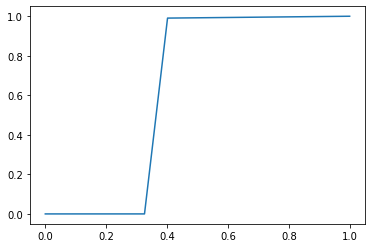

In [39]:
plt.plot(fpr, tpr)

## implementation no. 2: KNN classifier

In [32]:
# scaler
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(x_train)
#X_test = sc.transform(x_val)

# knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [41]:
y_pred = classifier.predict(x_val)

In [42]:
ac = metrics.accuracy_score(y_val,y_pred)
print('validation data: ')
print('-------------------------------------------------------')
print('accuracy: %0.2f' % (100*ac),'%')
print('-------------------------------------------------------')
print('confusion matrix \n',metrics.confusion_matrix(y_val, y_pred))
print('-------------------------------------------------------')
print(metrics.classification_report(y_val, y_pred, target_names=['Normal Flow', 'SYN', 'RUDY', 'Slowloris']))
print('-------------------------------------------------------')

validation data: 
-------------------------------------------------------
accuracy: 86.24 %
-------------------------------------------------------
confusion matrix 
 [[884795  55598  30022   5806]
 [117906 252623     23      0]
 [ 27927     56 308643   1003]
 [  9136      4   1943 117384]]
-------------------------------------------------------
              precision    recall  f1-score   support

 Normal Flow       0.85      0.91      0.88    976221
         SYN       0.82      0.68      0.74    370552
        RUDY       0.91      0.91      0.91    337629
   Slowloris       0.95      0.91      0.93    128467

    accuracy                           0.86   1812869
   macro avg       0.88      0.85      0.87   1812869
weighted avg       0.86      0.86      0.86   1812869

-------------------------------------------------------


In [33]:
y_pred_test = classifier.predict(x_test)

In [34]:
ac = metrics.accuracy_score(y_test,y_pred_test)
print('test data: ')
print('-------------------------------------------------------')
print('accuracy: %0.2f' % (100*ac),'%')
print('-------------------------------------------------------')
print('confusion matrix \n',metrics.confusion_matrix(y_test, y_pred_test))
print('-------------------------------------------------------')
print(metrics.classification_report(y_test, y_pred_test, target_names=['Normal Flow', 'SYN', 'RUDY', 'Slowloris']))
print('-------------------------------------------------------')

test data: 
-------------------------------------------------------
accuracy: 86.25 %
-------------------------------------------------------
confusion matrix 
 [[1795166  112629   61313   11967]
 [ 239064  514133      57       1]
 [  56728     100  627757    2046]
 [  18271       8    3986  237448]]
-------------------------------------------------------
              precision    recall  f1-score   support

 Normal Flow       0.85      0.91      0.88   1981075
         SYN       0.82      0.68      0.75    753255
        RUDY       0.91      0.91      0.91    686631
   Slowloris       0.94      0.91      0.93    259713

    accuracy                           0.86   3680674
   macro avg       0.88      0.85      0.87   3680674
weighted avg       0.86      0.86      0.86   3680674

-------------------------------------------------------


In [35]:
cm = metrics.confusion_matrix(y_test,y_pred_test)
cm
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test, pos_label=2)
metrics.auc(fpr, tpr)

0.550622849272103

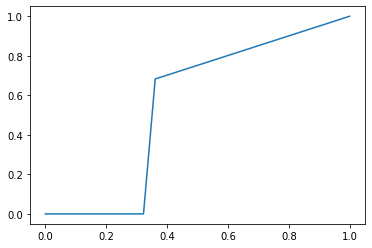

In [36]:
plt.plot(fpr,tpr)